# Importing Modules

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=(14, 8)

In [90]:
import warnings
warnings.simplefilter(action="ignore")

# Loading Data

In [91]:
df = pd.read_csv("train.csv")

In [92]:
df.shape

(1460, 81)

# Data Preprocessing

In [93]:
# Dropping columns in which 60% values are missing
def get_empty_columns(dataset, missing_threshold=80):
    empty_columns = []
    for i in dataset.columns:
        if((df[i].isnull().sum()/dataset.shape[0])*100 > missing_threshold):
            empty_columns.append(i)
    return empty_columns

empty_col = get_empty_columns(df, 39)
df.drop(empty_col, axis=1, inplace=True)
df.drop("Id", axis=1, inplace=True)

In [94]:
# Dropping half empty rows
index = df[(df.BsmtQual.isnull()) & (df.BsmtCond.isnull())].index
df.drop(index, axis=0, inplace=True)
index = df[(df.GarageType.isnull()) & (df.GarageYrBlt.isnull())].index
df.drop(index, axis=0, inplace=True)

In [95]:
# Filling NAN values
df["Electrical"].fillna(method="ffill", inplace=True)
df["BsmtFinType2"].fillna(method="ffill", inplace=True)
df["BsmtExposure"].fillna(method="ffill", inplace=True)
df["MasVnrType"].fillna(method="ffill", inplace=True)
df["MasVnrArea"].fillna(value=70, inplace=True)
df["LotFrontage"].fillna(value=70, inplace=True)

In [96]:
# Removing Outliers
df.drop(df[df.LotArea > 50000].index, axis=0, inplace=True)
df.drop(df[(df.SalePrice > 500000)].index, axis=0, inplace=True)
df.drop(df[(df.MiscVal > 1000)].index, axis=0, inplace=True)
df.drop(df[(df.GrLivArea > 3400)].index, axis=0, inplace=True)


In [97]:
# Labeling categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labeled_df = pd.DataFrame()
for col in df:
    if(df[col].dtype == "object"):
        labeled_df[col] = encoder.fit_transform(df[col])
    else:
        labeled_df[col] = df[col]

In [98]:
# Separating data into Dependent and Independent
x = labeled_df.drop("SalePrice", axis=1)
y = labeled_df["SalePrice"]

In [99]:
# Spliting data into Train Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# Model

In [104]:
# Training the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [101]:
model.score(x_test, y_test)

0.9018163544037365

In [102]:
y_pred = model.predict(x_test)

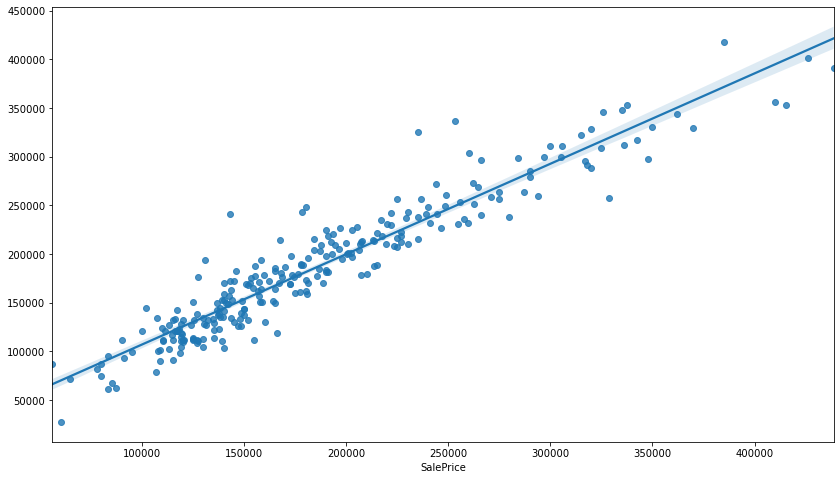

In [103]:
sns.regplot(y_test, y_pred)